# Aprendizaje Automático (Machine Learning)  
## K-Menas (Clustering - algoritmo no supervisado)

In [63]:
import pandas as pd

In [64]:
ruta = './Mall_Customers-2.csv'
df = pd.read_csv(ruta, index_col=0)

In [65]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [67]:
df.rename({'Annual Income (k$)': 'Ingreso', 'Spending Score (1-100)': 'Ponderacion'}, axis=1, inplace=True)
df.head()

,Gender,Age,Ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Ingreso,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Ponderacion,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [69]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

# Segmentación tradicional

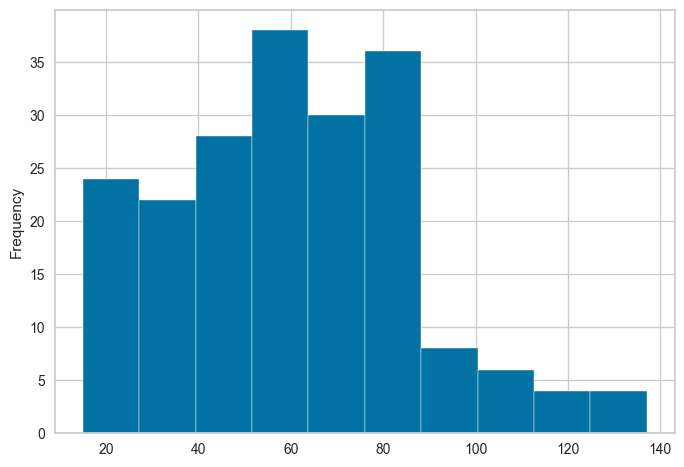

In [70]:
df.Ingreso.plot.hist();

In [71]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set()

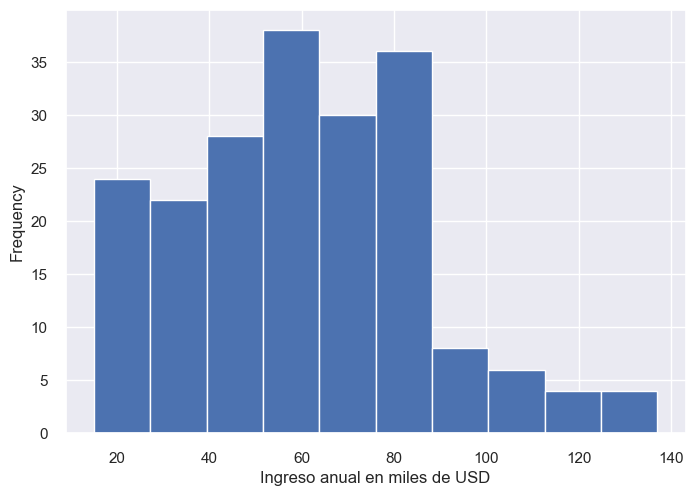

In [72]:
df.Ingreso.plot.hist()
plt.xlabel('Ingreso anual en miles de USD');

### Reglas a seguir  
- Si ingreso < 50 entonces 'ingreso bajo'
- Si 50 <= ingreso <= 90 'ingreso moderado'
- Si ingreso > 0 'ingreso alto'

In [73]:
import numpy as np

In [74]:
df['Segmento'] = np.where(df.Ingreso >= 90, 'Ingreso alto', np.where(df.Ingreso < 50, 'Ingreso bajo', 'Ingreso moderado'))
df

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso bajo
2,Male,21,15,81,Ingreso bajo
3,Female,20,16,6,Ingreso bajo
4,Female,23,16,77,Ingreso bajo
5,Female,31,17,40,Ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto
197,Female,45,126,28,Ingreso alto
198,Male,32,126,74,Ingreso alto


In [75]:
df.groupby('Segmento')['Ingreso'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
Ingreso alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Ingreso bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Ingreso moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
col_a_escalar = ['Age', 'Ingreso', 'Ponderacion']
datos_a_escalar = df.copy()

In [79]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(df[col_a_escalar])


In [80]:
df

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso bajo
2,Male,21,15,81,Ingreso bajo
3,Female,20,16,6,Ingreso bajo
4,Female,23,16,77,Ingreso bajo
5,Female,31,17,40,Ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto
197,Female,45,126,28,Ingreso alto
198,Male,32,126,74,Ingreso alto


In [81]:
datos_a_escalar

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo
...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso alto
197,Female,0.441365,2.497807,-0.861839,Ingreso alto
198,Male,-0.491602,2.497807,0.923953,Ingreso alto


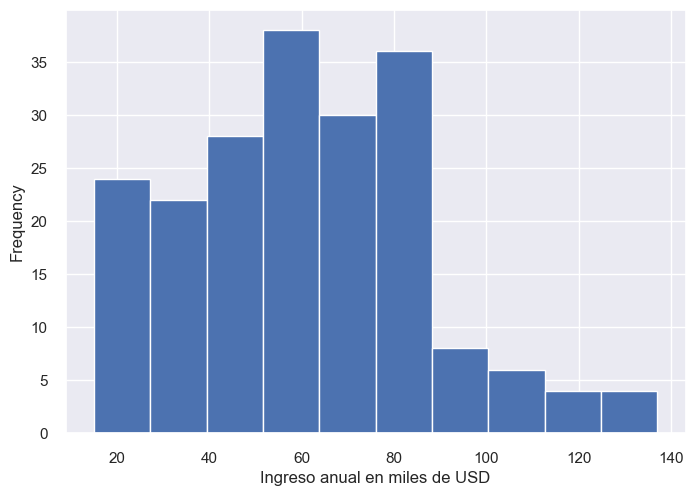

In [82]:
df.Ingreso.plot.hist()
plt.xlabel('Ingreso anual en miles de USD');

In [83]:
cluster_cols = ['Ingreso', 'Ponderacion']

c:\Users\pca20\Documents\GitHub\inteligencia_artificial\.venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


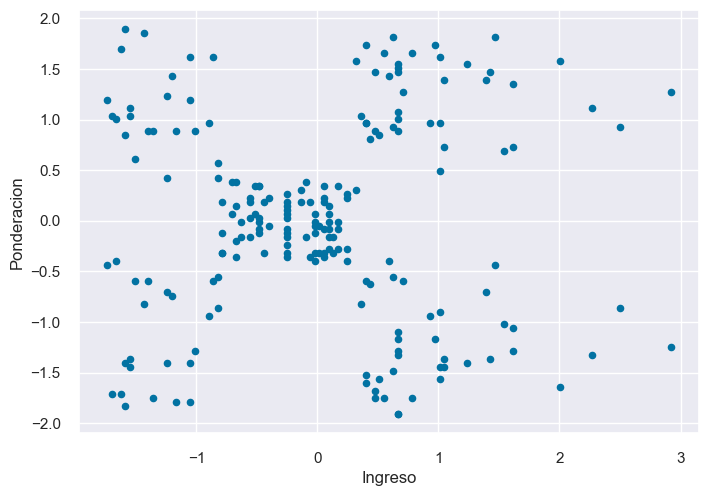

In [84]:
datos_a_escalar.plot.scatter(x='Ingreso', y='Ponderacion');

# Uso de KMeans

In [85]:
from sklearn.cluster import KMeans

In [86]:
modelo = KMeans(n_clusters=5, random_state=28)

In [87]:
modelo.fit(datos_a_escalar[cluster_cols])

KMeans(n_clusters=5, random_state=28)

In [88]:
datos_a_escalar

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo
...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso alto
197,Female,0.441365,2.497807,-0.861839,Ingreso alto
198,Male,-0.491602,2.497807,0.923953,Ingreso alto


In [89]:
datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[cluster_cols])

In [90]:
datos_a_escalar.Segmento.value_counts()

Segmento
Ingreso moderado    106
Ingreso bajo         72
Ingreso alto         22
Name: count, dtype: int64

In [91]:
datos_a_escalar.Segmento2.value_counts()

Segmento2
1    81
0    39
3    35
4    23
2    22
Name: count, dtype: int64

In [92]:
marcador = [
    '.',
    '|',
    'x',
    '*',
    '_',
]

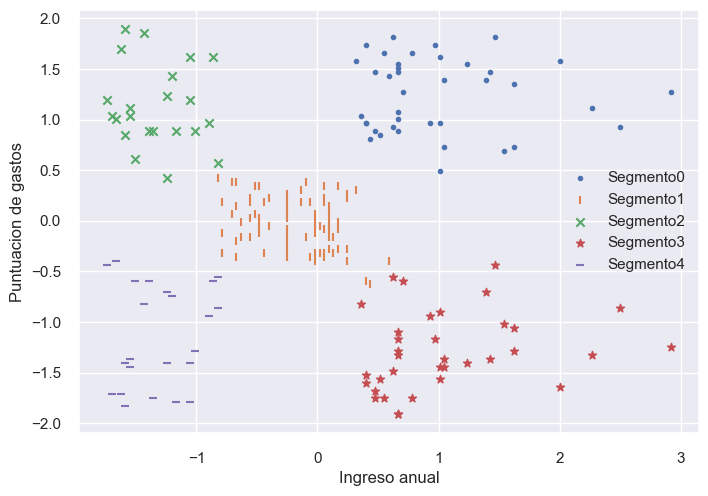

In [93]:
for segmento in range(5):
    temporal = datos_a_escalar[datos_a_escalar.Segmento2 == segmento]
    plt.scatter(temporal.Ingreso, temporal.Ponderacion, marker=marcador[segmento],
                label='Segmento'+str(segmento))
    
    plt.xlabel('Ingreso anual')
    plt.ylabel('Puntuacion de gastos')
    plt.legend();

# Utilizar más de dos dimensiones para el modelo de aprendizaje automático

In [94]:
cluster_cols = ['Age', 'Ingreso', 'Ponderacion']
datos_a_escalar[cluster_cols].head()

,Age,Ingreso,Ponderacion
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


In [95]:
modelo2 = KMeans(n_clusters=4, random_state=28)

In [96]:
modelo2.fit(datos_a_escalar[cluster_cols])

KMeans(n_clusters=4, random_state=28)

In [97]:
datos_a_escalar['Segmento3'] = modelo2.predict(datos_a_escalar[cluster_cols])

In [98]:
datos_a_escalar

,Gender,Age,Ingreso,Ponderacion,Segmento,Segmento2,Segmento3
CustomerID,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo,4,1
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo,2,1
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo,4,1
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo,2,1
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo,4,1
...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso alto,0,0
197,Female,0.441365,2.497807,-0.861839,Ingreso alto,3,3
198,Male,-0.491602,2.497807,0.923953,Ingreso alto,0,0


In [99]:
from sklearn import decomposition

In [100]:
pca = decomposition.PCA(n_components=2)
pca_resultado = pca.fit_transform(datos_a_escalar[cluster_cols])
pca_resultado

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

In [101]:
datos_a_escalar['PC1'] = pca_resultado[:, 0]
datos_a_escalar['PC2'] = pca_resultado[:, 1]
datos_a_escalar

,Gender,Age,Ingreso,Ponderacion,Segmento,Segmento2,Segmento3,PC1,PC2
CustomerID,,,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo,4,1,-0.615720,-1.763481
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo,2,1,-1.665793,-1.820747
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo,4,1,0.337862,-1.674799
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo,2,1,-1.456573,-1.772430
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo,4,1,-0.038465,-1.662740
...,...,...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso alto,0,0,-1.093705,2.215577
197,Female,0.441365,2.497807,-0.861839,Ingreso alto,3,3,0.800448,2.540748
198,Male,-0.491602,2.497807,0.923953,Ingreso alto,0,0,-1.119709,2.445169


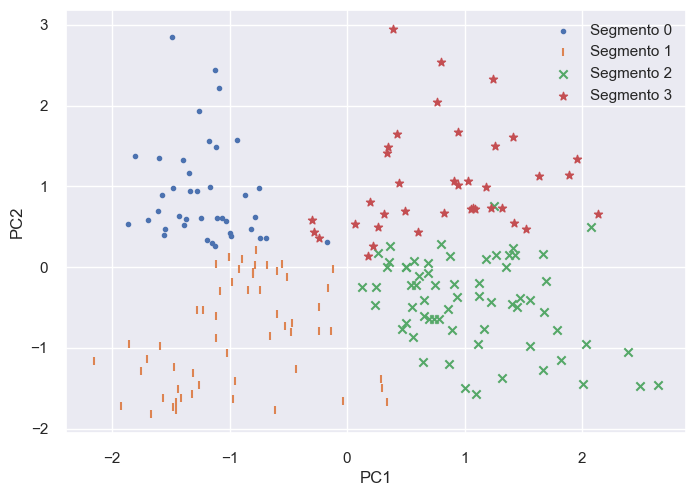

In [102]:
for segmento in range(4):
    temporal = datos_a_escalar[datos_a_escalar.Segmento3 == segmento]
    plt.scatter(temporal.PC1, temporal.PC2, marker=marcador[segmento],
                label='Segmento '+str(segmento))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show();

In [103]:
from yellowbrick.cluster import KElbowVisualizer
#!pip install yellowbrick

In [104]:
modelo = KMeans()
visualizador = KElbowVisualizer(modelo, k=(1,15))
x = df.copy()
x.drop(labels=('Segmento'), axis=1, inplace=True)

In [105]:
from sklearn.preprocessing import normalize

In [106]:
x['Gender'] = pd.get_dummies(df['Gender']).values[:, 0]

In [107]:
x1 = normalize(x)

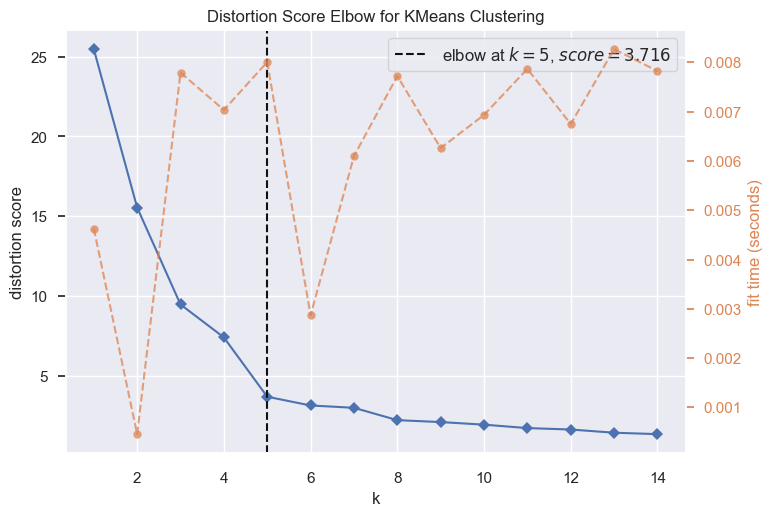

In [108]:
visualizador.fit(x1)
visualizador.show();

In [109]:
cliente = df[['Age', 'Ingreso', 'Ponderacion']].copy()

In [110]:
km = KMeans(n_clusters=5, n_init=100, max_iter=1000, init='random')

In [115]:
prediccionkm = km.fit_predict(cliente)

In [114]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [116]:
silhouette_score(cliente, prediccionkm)

0.44428597560893024

In [117]:
calinski_harabasz_score(cliente, prediccionkm)

151.04386000160667

In [140]:
# %matplotlib notebook # Para visualizar en 3D
%matplotlib inline

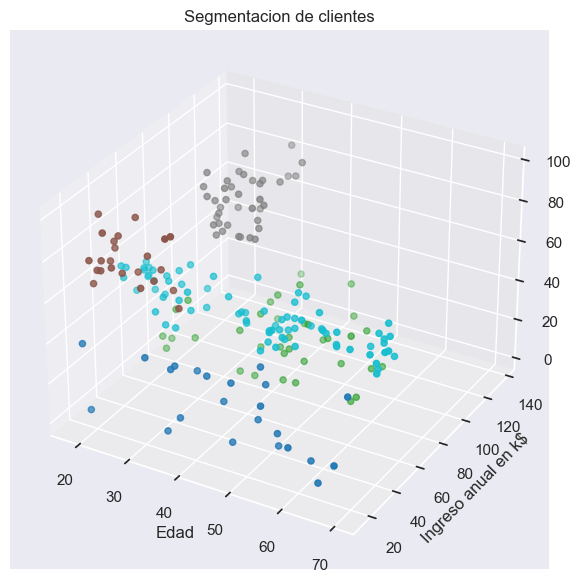

In [141]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter3D(cliente['Age'], cliente['Ingreso'], cliente['Ponderacion'], c=prediccionkm, cmap='tab10')
plt.title('Segmentacion de clientes')
plt.xlabel('Edad')
plt.ylabel('Ingreso anual en k$')
# plt.zlabel('Ponderacion de gastos')
plt.show();